# 1. Les expressions régulières : à quoi ça sert ?

Chercher un mot dans un texte est une tâche facile, c'est l'objectif de la méthode >>>find<<< attachée aux chaînes de caractères, elle suffit encore lorsqu'on cherche un mot au pluriel ou au singulier mais il faut l'appeler au moins deux fois pour chercher ces deux formes. Pour des expressions plus compliquées, il est conseillé d'utiliser les expressions régulières. C'est une fonctionnalité qu'on retrouve dans beaucoup de langages. C'est une forme de grammaire qui permet de rechercher des expressions.


Lorsqu'on remplit un formulaire, on voit souvent le format ``"MM/JJ/AAAA"`` qui précise sous quelle forme on s'attend à ce qu’une date soit écrite. Les expressions régulières permettent de définir également ce format et de chercher dans un texte toutes les chaînes de caractères qui sont conformes à ce format.

La liste qui suit contient des dates de naissance. On cherche à obtenir toutes les dates de cet exemple sachant que les jours ou les mois contiennent un ou deux chiffres, les années deux ou quatre.

In [1]:
s = """date 0 : 14/9/2000
date 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978
date 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914
date 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976"""

Le premier chiffre du jour est soit 0, 1, 2, ou 3 ; ceci se traduit par ``[0-3]``. Le second chiffre est compris entre 0 et 9, soit ``[0-9]``. Le format des jours est traduit par ``[0-3][0-9]``. Mais le premier jour est facultatif, ce qu'on précise avec le symbole ? : ``[0-3]?[0-9]``. Les mois suivent le même principe : ``[0-1]?[0-9]``. Pour les années, ce sont les deux premiers chiffres qui sont facultatifs, le symbole ? s'appliquent sur les deux premiers chiffres, ce qu'on précise avec des parenthèses : ``([0-2][0-9])?[0-9][0-9]``. Le format final d'une date devient :

In [2]:
"[0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9]"

'[0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9]'

Le module re gère les expressions régulières, celui-ci traite différemment les parties de l'expression régulière qui sont entre parenthèses de celles qui ne le sont pas : c'est un moyen de dire au module re que nous nous intéressons à telle partie de l'expression qui est signalée entre parenthèses. Comme la partie qui nous intéresse - une date - concerne l'intégralité de l'expression régulière, il faut insérer celle-ci entre parenthèses.

La première étape consiste à construire l'expression régulière, la seconde à rechercher toutes les fois qu'un morceau de la chaîne s définie plus haut correspond à l’expression régulière.

In [3]:
import re
# première étape : construction
expression = re.compile("([0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9])")
# seconde étape : recherche
res = expression.findall(s)
print(res)

[('14/9/2000', '20'), ('20/04/1971', '19'), ('14/09/1913', '19'), ('2/3/1978', '19'), ('1/7/1986', '19'), ('7/3/47', ''), ('15/10/1914', '19'), ('08/03/1941', '19'), ('8/1/1980', '19'), ('30/6/1976', '19')]


In [4]:
res

[('14/9/2000', '20'),
 ('20/04/1971', '19'),
 ('14/09/1913', '19'),
 ('2/3/1978', '19'),
 ('1/7/1986', '19'),
 ('7/3/47', ''),
 ('15/10/1914', '19'),
 ('08/03/1941', '19'),
 ('8/1/1980', '19'),
 ('30/6/1976', '19')]

In [5]:
expression.findall?

Signature: expression.findall(string, pos=0, endpos=9223372036854775807)
Docstring: Return a list of all non-overlapping matches of pattern in string.
Type:      builtin_function_or_method


Le résultat une liste de couples dont chaque élément correspond aux parties comprises entre parenthèses qu'on appelle des groupes. Lorsque les expressions régulières sont utilisées, on doit d'abord se demander comment définir ce qu’on cherche puis quelles fonctions utiliser pour obtenir les résultats de cette recherche. Les deux paragraphes qui suivent y répondent.

## 1.1 Syntaxe

La syntaxe des expressions régulières est décrite sur le site officiel de python. La page [Regular Expression Syntax](https://docs.python.org/3/library/re.html?highlight=re#regular-expression-syntax) décrit comment se servir des expressions régulières, les deux pages sont en anglais. Comme toute grammaire, celle des expressions régulières est susceptible d’évoluer au fur et à mesure des versions du langage python.

## 1.2 Les ensembles de caractères
Lors d’une recherche, on s’intéresse aux caractères et souvent aux classes de caractères : on cherche un chiffre, une lettre, un caractère dans un ensemble précis ou un caractère qui n’appartient pas à un ensemble précis. Certains ensembles sont prédéfinis, d’autres doivent être définis à l’aide de crochets.

Pour définir un ensemble de caractères, il faut écrire cet ensemble entre crochets : [0123456789] désigne un chiffre. Comme c’est une séquence de caractères consécutifs, on peut résumer cette écriture en [0-9]. Pour inclure les symboles -, +, il suffit d’écrire : [-0-9+]. Il faut penser à mettre le symbole - au début pour éviter qu’il ne désigne une séquence.

Le caractère ^ inséré au début du groupe signifie que le caractère cherché ne doit pas être un de ceux qui suivent. Le tableau suivant décrit les ensembles prédéfinis et leur équivalent en terme d’ensemble de caractères :

* ``.`` désigne tout caractère non spécial quel qu'il soit.
* ``\d`` désigne tout chiffre, est équivalent à ``[0-9]``.
* ``\D`` désigne tout caractère différent d'un chiffre, est équivalent à ``[^0-9]``.
* ``\s`` désigne tout espace ou caractère approché, est équivalent à ``[\; \t\n\r\f\v]``. Ces caractères sont spéciaux, les plus utilisés sont ``\t`` qui est une tabulation, ``\n`` qui est une fin de ligne et ``\r`` qui est un retour à la ligne.
* ``\S`` désigne tout caractère différent d'un espace, est équivalent à ``[^ \t\n\r\f\v]``.
* ``\w`` désigne tout lettre ou chiffre, est équivalent à ``[a-zA-Z0-9_]``.
* ``\W`` désigne tout caractère différent d'une lettre ou d'un chiffre, est équivalent à ``[^a-zA-Z0-9_]``.
* ``^`` désigne le début d'un mot sauf s'il est placé entre crochets.
* ``$`` désigne la fin d'un mot sauf s'il est placé entre crochets.

A l'instar des chaînes de caractères, comme le caractère ``\`` est un caractère spécial, il faut le doubler : ``[\\]``.

Le caractère ``\`` est déjà un caractère spécial pour les chaînes de caractères en python, il faut donc le quadrupler pour l'insérer dans une expression régulière. L'expression suivante filtre toutes les images dont l’extension est png et qui sont enregistrées dans un répertoire image.

In [6]:
import re
s = "something\\support\\vba\\image/vbatd1_4.png"
print(re.compile("[\\\\/]image[\\\\/].*[.]png").search(s))  # résultat positif
print(re.compile("[\\\\/]image[\\\\/].*[.]png").search(s))  # même résultat

<re.Match object; span=(21, 40), match='\\image/vbatd1_4.png'>
<re.Match object; span=(21, 40), match='\\image/vbatd1_4.png'>


## 1.3 Les multiplicateurs
Les multiplicateurs permettent de définir des expressions régulières comme : un mot entre six et huit lettres qu’on écrira ``[\w]{6,8}``. Le tableau suivant donne la liste des multiplicateurs principaux :

* ``*`` présence de l'ensemble de caractères qui précède entre 0 fois et l'infini
* ``+`` présence de l'ensemble de caractères qui précède entre 1 fois et l'infini
* ``?`` présence de l'ensemble de caractères qui précède entre 0 et 1 fois
* ``{m,n}`` présence de l'ensemble de caractères qui précède entre *m* et *n* fois, si *m=n*, cette expression peut être résumée par ``{n}``.
* ``(?!(...))`` absence du groupe désigné par les points de suspensions.

L’algorithme des expressions régulières essaye toujours de faire correspondre le plus grand morceau à l’expression régulière. 

In [7]:
"<h1>mot</h1>"

'<h1>mot</h1>'

``<.*>`` correspond avec ``<h1>``, ``</h1>`` ou encore ``<h1>mot</h1>``.

Par conséquent, l’expression régulière correspond à trois morceaux. Par défaut, il prendra le plus grand. Pour choisir les plus petits, il faudra écrire les multiplicateurs comme ceci : ``*?``, ``+?``

In [8]:
import re
s = "<h1>mot</h1>"
print(re.compile("(<.*>)").match(s).groups())   # ('<h1>mot</h1>',)
print(re.compile("(<.*?>)").match(s).groups())  # ('<h1>',)
print(re.compile("(<.+?>)").match(s).groups())  # ('<h1>',)

('<h1>mot</h1>',)
('<h1>',)
('<h1>',)


### Exercice 1

Recherchez les dates présentes dans la phrase suivante

In [9]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Ma seconde femme est morte le 10/11/1963. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

Puis dans celle-ci : 

In [10]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Je me suis marié le 8/5/45. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

# 2. Web Scrapping

Sous ce nom se cache une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n'existant pas forcément sous la forme d'un tableau *Excel*... Bref, il s'agit de récupérer des informations depuis *Internet*.

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d'extraction du contenu des sites internet. Via un programme informatique : nous allons aujourd'hui vous présenter comme créer et exécuter ces robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

## 2.1 Un détour par le Web : comment fonctionne un site ?

Même si nous n'allons pas aujourd'hui faire un cours de web, il vous faut néanmoins certaines bases pour comprendre comment un site internet fonctionne et comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d'une page *Web*.

###  HTML 

### Les balises


Sur une page web, vous trouverez toujours à coup sûr des éléments comme ``<head>``, ``<title>``, etc. Il  s'agit des codes qui vous permettent de structurer le contenu d'une page *HTML* et qui s'appellent des balises. 
Citons, par exemple, les balises ``<p>``, ``<h1>``, ``<h2>``, ``<h3>``, ``<strong>`` ou ``<em>``.
Le symbole ``< >`` est une balise : il sert à indiquer le début d'une partie. Le symbole ``</ >`` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple ``<p>`` et ``</p>``).

#### Exemple : les balise des tableaux

$$
\begin{array}{rr} \hline
Balise  & \text{Description} \\ \hline
< table> & \text{Tableau} \\
< caption>& \text{Titre du tableau} \\
< tr> & \text{Ligne de tableau} \\
< th> & \text{Cellule d'en-tête}\\
< td> & \text{Cellule} \\
< thead> & \text{Section de l'en-tête du tableau} \\
< tbody> & \text{Section du corps du tableau} \\
< tfoot> & \text{Section du pied du tableau} \\
\end{array}
$$

#### Exemple 

<table>
   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike</td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

#### Parent et enfant

Dans le cadre du langage HTML, les termes de parents (parent) et enfants (child) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

On dira que l'élément ``<div>`` est le parent de l'élément ``<p>`` tandis que l'élément ``<p>`` est l'enfant de l'élément ``<div>``.

----------

Mais pourquoi apprendre ça pour scraper me direz-vous ?

Pour bien récupérer les informations d'un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scrapping sont principalement construites pour vous permettre de naviguer entre les balises.

## 2.2 Scrapper avec python

Nous allons essentiellement utiliser le package [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) pour cet atelier, mais d'autres packages existent ([Selenium](https://selenium-python.readthedocs.io/), [Scrapy](https://scrapy.org/)...).

[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) sera suffisant quand vous voudrez travailler sur des pages HTML statiques, dès que les informations que vous recherchez sont générées via l'exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme Selenium.

De même, si vous ne connaissez pas l'URL, il faudra passer par un framework comme [Scrapy](https://scrapy.org/), qui passe facilement d'une page à une autre ("crawl"). Scrapy est plus complexe à manipuler que [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) : si vous voulez plus de détails, rendez-vous sur la page du tutorial [Scrapy Tutorial](https://doc.scrapy.org/en/latest/intro/tutorial.html).

### Utiliser BeautifulSoup

Les packages pour scrapper des pages HTML : 
- [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) (``pip install bs4``)
- [urllib](https://docs.python.org/3/library/urllib.html#module-urllib)

In [11]:
import urllib
import bs4
#help(bs4)

#### 1ere page HTML

On va commencer facilement, prenons une page wikipedia, par exemple celle de la Ligue 1 de football : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

In [12]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
    
from urllib import request

request_text = request.urlopen(url_ligue_1).read()
print(request_text[:1000])    

b'<!DOCTYPE html>\n<html class="client-nojs" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Championnat de France de football 2019-2020 \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janvier","f\xc3\xa9vrier","mars","avril","mai","juin","juillet","ao\xc3\xbbt","septembre","octobre","novembre","d\xc3\xa9cembre"],"wgMonthNamesShort":["","janv.","f\xc3\xa9v.","mars","avr.","mai","juin","juill.","ao\xc3\xbbt","sept.","oct.","nov.","d\xc3\xa9c."],"wgRequestId":"XmNm@QpAADwAAATew5cAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Championnat_de_France_de_football_2019-2020","wgTitle":"Championnat de France de football 2019-2020","wgCurRevisionId":168172389,"wgRevisionId":168172389,"wgArticleId":12518858,"wgI

In [13]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

#print(page)

Si on print l'objet, page créée avec BeautifulSoup, on voit que ce n'est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présent chercher des élements à l'intérieur de ces balises.


par exemple, si on veut connaire le titre de la page, on utilise la méthode .find et on lui demande "title"

In [14]:
print(page.find("title"))

<title>Championnat de France de football 2019-2020 — Wikipédia</title>


La methode ``.find`` ne renvoie que la première occurence de l'élément

In [15]:
print(page.find("table"))

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg

---------------
Pour trouver toutes les occurences, on utilise ``.findAll()``.

In [16]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

Il y a 33 éléments dans la page qui sont des <table>


In [17]:
print(" Le 2eme tableau de la page : Hiérarchie \n", page.findAll("table")[1])
print("--------------------------------------------------------")
print("Le 3eme tableau de la page : Palmarès \n",page.findAll("table")[2])

 Le 2eme tableau de la page : Hiérarchie 
 <table><caption style="background:#99cc99;color:#000000;">Hiérarchie</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Hiérarchie</th>
<td>
<abbr class="abbr" title="Premier">1<sup>er</sup></abbr> échelon</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Niveau inférieur</th>
<td>
<a href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020" title="Championnat de France de football de Ligue 2 2019-2020">Ligue 2 2019-2020</a></td>
</tr></tbody></table>
--------------------------------------------------------
Le 3eme tableau de la page : Palmarès 
 <table><caption style="background:#99cc99;color:#000000;">Palmarès</caption>
<tbody><tr>
<th scope="row" style="width:10.5em;">Tenant du titre</th>
<td>
<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a> (8)</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Promu(s) en début de saison</th>
<td>
<a href="/wiki/Fo

### Exercice guidé : obtenir la liste des équipes de Ligue 1

La liste des équipes est dans le tableau ``"Participants"`` : dans le code source, on voit que ce tableau est celui qui a ``class="DebutCarte"``. On voit également que les balises qui encerclent les noms et les urls des clubs sont de la forme suivante

```
<a href="url_club" title="nom_club"> Nom du club </a>
```

In [18]:
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    print(item, "\n-------")

<a class="image" href="/wiki/Fichier:France_location_map-Regions-2016.svg"><img alt="France location map-Regions-2016.svg" data-file-height="1922" data-file-width="2000" decoding="async" height="288" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/300px-France_location_map-Regions-2016.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/450px-France_location_map-Regions-2016.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/600px-France_location_map-Regions-2016.svg.png 2x" width="300"/></a> 
-------
<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a> 
-------
<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a> 
-------
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a> 
-------
<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" titl

On n'a pas envie de prendre le premier élément qui ne correspond pas à un club mais à une image.
Or cet élément est le seul qui n'ait pas de ``title=""``. Il est conseillé d'exclure les élements qui ne nous intéressent pas en indiquant les éléments que la ligne doit avoir au lieu de les exclure en fonction de leur place dans la liste.

In [19]:
### condition sur la place dans la liste >>>> MAUVAIS
for e, item in enumerate(page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5]) : 
    if  e == 0: 
        pass
    else : 
        print(item)

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a>
<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>


In [20]:
#### condition sur les éléments que doit avoir la ligne >>>> BIEN 
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item)

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a>
<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>


Enfin la dernière étape, consiste à obtenir les informations souhaitées, c'est à dire dans notre cas, le nom et l'url des 20 clubs. Pour cela, nous allons utiliser deux méthodes de l'élement item :

- ``getText()`` qui permet d'obtenir le texte qui est sur la page web et dans la balise  ``<a>``
- ``get('xxxx')`` qui permet d'obtenir l'élément qui est égal à ``xxxx``

Dans notre cas, nous allons vouloir le nom du club ainsi que l'url : on va donc utiliser ``__getText__`` et ``__get("href")__``.

In [21]:
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item.get("href"))
        print(item.getText())

/wiki/Paris_Saint-Germain_Football_Club
Paris SG
/wiki/LOSC_Lille
LOSC Lille
/wiki/Olympique_lyonnais
Olympique lyonnais
/wiki/Association_sportive_de_Saint-%C3%89tienne
AS Saint-Étienne


In [22]:
# pour avoir le nom officiel, on aurait utiliser l'élément <title>
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item.get("title"))

Paris Saint-Germain Football Club
LOSC Lille
Olympique lyonnais
Association sportive de Saint-Étienne


Toutes ces informations, on souhaite les conserver dans un tableau *Excel* pour pouvoir les réuitiliser à l'envie : pour cela, rien de plus simple, on va passer par pandas, parce qu'on le maitrise parfaitement à ce stade de la formation.

In [23]:
import pandas

liste_noms = []
liste_urls = []

for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'}) : 
    if item.get("title") :
        liste_urls.append(item.get("href"))
        liste_noms.append(item.getText())
        
df = pandas.DataFrame.from_dict( {"clubs" : liste_noms, 'url' : liste_urls})
df.head()

,clubs,url
0,Paris SG,/wiki/Paris_Saint-Germain_Football_Club
1,LOSC Lille,/wiki/LOSC_Lille
2,Olympique lyonnais,/wiki/Olympique_lyonnais
3,AS Saint-Étienne,/wiki/Association_sportive_de_Saint-%C3%89tienne
4,Olympique deMarseille,/wiki/Olympique_de_Marseille


### Exercice de web scraping avec BeautifulSoup

Pour cet exercice, nous vous demandons d'obtenir 1) les informations personnelles des 721 pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Pokemon Database](http://pokemondb.net/pokedex/nincada).



In [24]:
import collections
from urllib import request
import bs4
import pandas as pd
import numpy as np
#help(bs4)

# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_pokémons = urllib.request.Request('http://pokemondb.net/pokedex/national',
                             headers={'User-Agent': 'Mozilla/5.0'})
html = urllib.request.urlopen(url_pokémons).read()


In [25]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(html, "lxml")

request_text = request.urlopen(url_pokémons).read()
print(request_text[:1000])  

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<title>List of Pok\xc3\xa9mon (sprites gallery) | Pok\xc3\xa9mon Database</title>\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link rel="preconnect" href="https://img.pokemondb.net">\n<link rel="stylesheet" href="/static/css/pokemondb-7c22d512a3.css">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<meta property="og:description" name="description" content="A simple list of all 890 Pok\xc3\xa9mon by National Dex number, with images.">\n<link rel="canonical" href="https://pokemondb.net/pokedex/national">\n<meta property="og:url" content="https://pokemondb.net/pokedex/national">\n<meta property="og:title" content="List of Pok\xc3\xa9mon (sprites gallery)">\n<meta name="twitter:card" content="summary">\n<link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">\n<link rel="apple-touch-icon-precomposed" href="/apple-touch-icon-precomposed.png">\n<link rel="alternate" type="app

In [26]:
#page

In [27]:
# Etape 3 : récupérer la liste des noms de pokémon

liste_pokemon = []

for pokemon in page.findAll('span', {'class': 'infocard-lg-img'}) :
    pokemon = pokemon.find('a').get('href').replace("/pokedex/",'')
    liste_pokemon.append(pokemon)
print(liste_pokemon)

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate', 'spearow', 'fearow', 'ekans', 'arbok', 'pikachu', 'raichu', 'sandshrew', 'sandslash', 'nidoran-f', 'nidorina', 'nidoqueen', 'nidoran-m', 'nidorino', 'nidoking', 'clefairy', 'clefable', 'vulpix', 'ninetales', 'jigglypuff', 'wigglytuff', 'zubat', 'golbat', 'oddish', 'gloom', 'vileplume', 'paras', 'parasect', 'venonat', 'venomoth', 'diglett', 'dugtrio', 'meowth', 'persian', 'psyduck', 'golduck', 'mankey', 'primeape', 'growlithe', 'arcanine', 'poliwag', 'poliwhirl', 'poliwrath', 'abra', 'kadabra', 'alakazam', 'machop', 'machoke', 'machamp', 'bellsprout', 'weepinbell', 'victreebel', 'tentacool', 'tentacruel', 'geodude', 'graveler', 'golem', 'ponyta', 'rapidash', 'slowpoke', 'slowbro', 'magnemite', 'magneton', 'farfetchd', 'doduo', 'dodrio', 'seel', 'dew

In [28]:
# Etape 4 : aller chercher mes Pokemon individuellement afin deremplir les 4 tableaux.
# En partant de l'url :
# https://pokemondb.net/pokedex/bulbasaur <<< lien commun à tous + nom pokemon

def get_page(pokemon_name):
    url_pokémons = 'http://pokemondb.net/pokedex/'+ pokemon_name    
    url_pok = urllib.request.Request(url_pokémons, headers={'User-Agent': 'Mozilla/5.0'})
    html = urllib.request.urlopen(url_pok).read()
    return bs4.BeautifulSoup(html, "lxml")  

$$
\begin{array}{rr} \hline
Balise  & \text{Description} \\ \hline
< table> & \text{Tableau} \\
< caption>& \text{Titre du tableau} \\
< tr> & \text{Ligne de tableau} \\
< th> & \text{Cellule d'en-tête}\\
< td> & \text{Cellule} \\
< thead> & \text{Section de l'en-tête du tableau} \\
< tbody> & \text{Section du corps du tableau} \\
< tfoot> & \text{Section du pied du tableau} \\
\end{array}
$$

In [29]:
# Etape 5 : Créer un tableau Pokédex data

def Pokedex_data(pokemon_name):
    page = get_page(pokemon_name) #fonction d'appel de mon pokemon 
    data = collections.defaultdict() #empêche les erreurs de clé . Toute clé qui n'existe pas obtiendra la valeur renvoyée par défaut.
    
    
    for table in page.findAll('table', { 'class' : "vitals-table"})[0:4]  : #tableau
        tableau = table.find('tbody') #sections du corps du tableau
        for lignes in tableau.findChildren(['tr']) : #ligne tableau (sous-titres + valeurs)
            if len(lignes) > 1 : 
                cellules = lignes.findChild('th').getText() #cellules des "titres"
                cellules_valeurs = lignes.findChild('td').getText() #cellule des valeurs correspondant aux titres
                cellules_valeurs = cellules_valeurs.replace('\t','').replace('\n',' ')
                data[cellules] = cellules_valeurs
                data['name'] = pokemon_name                
    return dict(data)




In [30]:
items = []
for e, pokemon in enumerate(liste_pokemon) :
    print(e, pokemon)
    item = Pokedex_data(pokemon)
    items.append(item)
    if e > 10:
        break
df = pd.DataFrame(items)
df.head()

0 bulbasaur
1 ivysaur
2 venusaur
3 charmander
4 charmeleon
5 charizard
6 squirtle
7 wartortle
8 blastoise
9 caterpie
10 metapod
11 butterfree


,National №,name,Type,Species,Height,Weight,Abilities,Local №,EV yield,Catch rate,...,Growth Rate,Egg Groups,Gender,Egg cycles,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,bulbasaur,Grass Poison,Seed Pokémon,0.7 m (2′04″),6.9 kg (15.2 lbs),1. OvergrowChlorophyll (hidden ability),001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)...,1 Special Attack,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",45,49,49,65,65,45
1,002,ivysaur,Grass Poison,Seed Pokémon,1.0 m (3′03″),13.0 kg (28.7 lbs),1. OvergrowChlorophyll (hidden ability),002 (Red/Blue/Yellow)227 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",60,62,63,80,80,60
2,003,venusaur,Grass Poison,Seed Pokémon,2.0 m (6′07″),100.0 kg (220.5 lbs),1. OvergrowChlorophyll (hidden ability),003 (Red/Blue/Yellow)228 (Gold/Silver/Crystal)...,"2 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",80,82,83,100,100,80
3,004,charmander,Fire,Lizard Pokémon,0.6 m (2′00″),8.5 kg (18.7 lbs),1. BlazeSolar Power (hidden ability),004 (Red/Blue/Yellow)229 (Gold/Silver/Crystal)...,1 Speed,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",39,52,43,60,50,65
4,005,charmeleon,Fire,Flame Pokémon,1.1 m (3′07″),19.0 kg (41.9 lbs),1. BlazeSolar Power (hidden ability),005 (Red/Blue/Yellow)230 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Speed","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",58,64,58,80,65,80


In [31]:
dfok = df[["name", "National №", "Base Exp."]]
dfok.head()

,name,National №,Base Exp.
0,bulbasaur,001,64
1,ivysaur,002,142
2,venusaur,003,236
3,charmander,004,62
4,charmeleon,005,142


In [32]:
#df2 = df.cumsum(axis = 'columns')

In [33]:
#df2

In [34]:
#df.append(df.sum(numeric_only=True), ignore_index=True).head()
#df.append(df.sum(numeric_only=True), ignore_index=True).rename('Total')

In [35]:
#import numpy as np
#total = df.apply(np.sum)
#total['HP','Attack','Defense','Sp. Atk', 'Sp. Def','Speed'] = 'tot'
#df.append(pd.DataFrame(total.values, index=total.keys()).T, ignore_index=True).head(2)

In [36]:
dftotal = df[['HP','Attack','Defense','Sp. Atk', 'Sp. Def','Speed']]
dftotal.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80


In [37]:
np.shape(dftotal)

(12, 6)

In [38]:
dftotal.dtypes

HP         object
Attack     object
Defense    object
Sp. Atk    object
Sp. Def    object
Speed      object
dtype: object

In [39]:
type(dftotal["HP"][0])

str

In [40]:
type(dftotal["Attack"][0])

str

In [41]:
type(dftotal["Sp. Atk"][0])

str

In [42]:
dftotal.dtypes

HP         object
Attack     object
Defense    object
Sp. Atk    object
Sp. Def    object
Speed      object
dtype: object

In [75]:
# Lecture du fichier:
colTypes = dftotal
print(colTypes)

# Itérer à travers chaque ligne et assigner le type de variable
# Remarque: astype est utilisé pour assigner des types

for i, row in colTypes.iterrows():  # i: dataframe index; row: chaque ligne (row) au format series
    if row['object']=="categorical":
        dftotal[row['HP']]=dftotala[row['feature']].astype(np.object)
    elif row['object']=="continuous":
        dftotal[row['HP']]=dftotal[row['feature']].astype(np.float)
print(dftotal.dtypes)

    HP Attack Defense Sp. Atk Sp. Def Speed
0   45     49      49      65      65    45
1   60     62      63      80      80    60
2   80     82      83     100     100    80
3   39     52      43      60      50    65
4   58     64      58      80      65    80
5   78     84      78     109      85   100
6   44     48      65      50      64    43
7   59     63      80      65      80    58
8   79     83     100      85     105    78
9   45     30      35      20      20    45
10  50     20      55      25      25    30
11  60     45      50      90      80    70


KeyError: 'object'

In [ ]:
dftotal.dtypes

In [44]:
type(dftotal["HP"][0])

str

2) Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  (indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))
_pour cette question ci, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

In [65]:
import shutil
import requests


for e, pokemon in enumerate(liste_pokemon) :
    print(e,pokemon)
    url = "https://img.pokemondb.net/artwork/{}.jpg".format(pokemon)
    response = requests.get(url, stream=True)
    # avec l'option stream, on ne télécharge pas l'objet de l'url
    with open('{}.jpg'.format(pokemon), 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    if e > 100:
        break

0 bulbasaur
1 ivysaur
2 venusaur
3 charmander
4 charmeleon
5 charizard
6 squirtle
7 wartortle
8 blastoise
9 caterpie
10 metapod
11 butterfree
12 weedle
13 kakuna
14 beedrill
15 pidgey
16 pidgeotto
17 pidgeot
18 rattata
19 raticate
20 spearow
21 fearow
22 ekans
23 arbok
24 pikachu
25 raichu
26 sandshrew
27 sandslash
28 nidoran-f
29 nidorina
30 nidoqueen
31 nidoran-m
32 nidorino
33 nidoking
34 clefairy
35 clefable
36 vulpix
37 ninetales
38 jigglypuff
39 wigglytuff
40 zubat
41 golbat
42 oddish
43 gloom
44 vileplume
45 paras
46 parasect
47 venonat
48 venomoth
49 diglett
50 dugtrio
51 meowth
52 persian
53 psyduck
54 golduck
55 mankey
56 primeape
57 growlithe
58 arcanine
59 poliwag
60 poliwhirl
61 poliwrath
62 abra
63 kadabra
64 alakazam
65 machop
66 machoke
67 machamp
68 bellsprout
69 weepinbell
70 victreebel
71 tentacool
72 tentacruel
73 geodude
74 graveler
75 golem
76 ponyta
77 rapidash
78 slowpoke
79 slowbro
80 magnemite
81 magneton
82 farfetchd
83 doduo
84 dodrio
85 seel
86 dewgong
87 g

In [66]:
import os
names = [name for name in os.listdir('.') if '.jpg' in name]
names[:100]

['abra.jpg',
 'alakazam.jpg',
 'arbok.jpg',
 'arcanine.jpg',
 'beedrill.jpg',
 'bellsprout.jpg',
 'blastoise.jpg',
 'bulbasaur.jpg',
 'butterfree.jpg',
 'caterpie.jpg',
 'charizard.jpg',
 'charmander.jpg',
 'charmeleon.jpg',
 'clefable.jpg',
 'clefairy.jpg',
 'cloyster.jpg',
 'dewgong.jpg',
 'diglett.jpg',
 'dodrio.jpg',
 'doduo.jpg',
 'drowzee.jpg',
 'dugtrio.jpg',
 'ekans.jpg',
 'electrode.jpg',
 'exeggcute.jpg',
 'farfetchd.jpg',
 'fearow.jpg',
 'gastly.jpg',
 'gengar.jpg',
 'geodude.jpg',
 'gloom.jpg',
 'golbat.jpg',
 'golduck.jpg',
 'golem.jpg',
 'graveler.jpg',
 'grimer.jpg',
 'growlithe.jpg',
 'haunter.jpg',
 'hypno.jpg',
 'ivysaur.jpg',
 'jigglypuff.jpg',
 'kadabra.jpg',
 'kakuna.jpg',
 'kingler.jpg',
 'krabby.jpg',
 'machamp.jpg',
 'machoke.jpg',
 'machop.jpg',
 'magnemite.jpg',
 'magneton.jpg',
 'mankey.jpg',
 'meowth.jpg',
 'metapod.jpg',
 'muk.jpg',
 'nidoking.jpg',
 'nidoqueen.jpg',
 'nidoran-f.jpg',
 'nidoran-m.jpg',
 'nidorina.jpg',
 'nidorino.jpg',
 'ninetales.jpg',
 'o

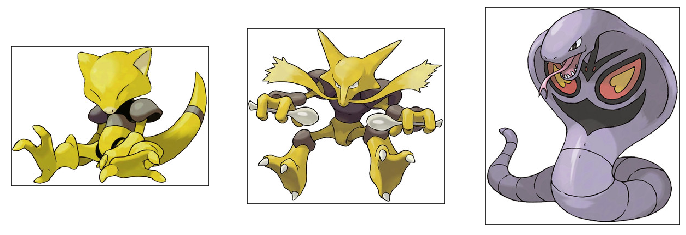

In [74]:
import matplotlib.pyplot as plt
import skimage.io as imio

fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, name in enumerate(names[:ax.shape[0]]):
    img = imio.imread(name)
    ax[i].imshow(img)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)